Time Series Analysis of the Air Quality Index (AQI)
Model Used - Prophet Model developed by Facebook (FB Prophet Model)

In [90]:
# Importing pandas module to create data frames
import pandas as pd

In [91]:
# Reading the dataset using the "pd.read_csv()" method
data_2021 = pd.read_csv("dataset/2021.csv")

# Displaying the first and last 5 (default) rows of dataset using "<var_name>.head()" and "<var_name>.tail()"
data_2021.tail()

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  \
8755  2021-12-31 19:00:00         193.45        327.58       58.78   
8756  2021-12-31 20:00:00         238.55        536.45       98.42   
8757  2021-12-31 21:00:00         252.55        418.60      147.79   
8758  2021-12-31 22:00:00         243.60        490.78      116.97   
8759  2021-12-31 23:00:00         242.30        505.50       63.95   

      NO2 (µg/m³)  NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  \
8755        44.99      70.96       111.49        13.20        0.58   
8756        37.85      98.87       121.48        22.77        0.98   
8757        33.38     135.99       147.31        10.29        1.68   
8758        33.70     111.50       127.42         6.36        0.90   
8759        31.43      67.87        90.17         4.18        0.78   

      Ozone (µg/m³)  ...  MP-Xylene (µg/m³)  AT (°C)  RH (%)  WS (m/s)  \
8755          12.21  ...               8.14      NaN   81.22      0.10   
8756          11.14  ...              13.11      NaN   88.43      0.12   
8757          13.31  ...              13.17      NaN   89.95      0.10   
8758          12.64  ...              11.88      NaN   89.92      0.15   
8759          12.96  ...               8.16      NaN   89.55      0.11   

      WD (deg)  RF (mm)  TOT-RF (mm)  SR (W/mt2)  BP (mmHg)  VWS (m/s)  
8755    174.20      NaN          NaN        3.97        NaN        NaN  
8756    162.22      NaN          NaN        4.52        NaN        NaN  
8757    180.84      NaN          NaN        5.05        NaN        NaN  
8758    176.72      NaN          NaN        5.03        NaN        NaN  
8759    166.76      NaN          NaN        4.58        NaN        NaN  

[5 rows x 25 columns]

In [92]:
data_2021.shape

(8760, 25)

In [93]:
data_2022 = pd.read_csv("dataset/2022.csv")
data_2022.shape

(8760, 25)

In [94]:
data_2023 = pd.read_csv("dataset/2023.csv")
data_2023.shape

(8760, 25)

In [95]:
data_2024 = pd.read_csv("dataset/2024.csv")
data_2024.shape

(7799, 21)

Data Pre-Processing
1. Selecting only the PM2.5 and PM10 Attributes from the dataset
2. Renameing the Selected attributes of dataframes as 'Date_Time', 'PM2.5' and 'PM10'
3. Converting Date_Time attribute of dataframe data_2024 in "%Y-%m-%d %H:%M:%S" format
4. Checking and Removing the missing values from the data frames
5. Mergeing all the data frames into one dataframe so that we can perform time series analysis on that complete dataset

In [96]:
data_2021 = data_2021[['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)']]
data_2022 = data_2022[['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)']]
data_2023 = data_2023[['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)']]
data_2024 = data_2024[['To Date', 'PM2.5', 'PM10']]

In [97]:
data_2021.rename(columns={'Timestamp': 'Date_Time', 'PM2.5 (µg/m³)': 'PM2.5', 'PM10 (µg/m³)': 'PM10'}, inplace=True)
data_2022.rename(columns={'Timestamp': 'Date_Time', 'PM2.5 (µg/m³)': 'PM2.5', 'PM10 (µg/m³)': 'PM10'}, inplace=True)
data_2023.rename(columns={'Timestamp': 'Date_Time', 'PM2.5 (µg/m³)': 'PM2.5', 'PM10 (µg/m³)': 'PM10'}, inplace=True)
data_2024.rename(columns={'To Date': 'Date_Time'}, inplace=True)

In [98]:
data_2024['Date_Time'] = pd.to_datetime(data_2024['Date_Time'], format="%d-%m-%Y %H:%M")
data_2024['Date_Time'] = data_2024['Date_Time'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [99]:
#Checking for the missing values in the daraframes
data_2021.isnull().sum()

Date_Time      0
PM2.5        298
PM10         298
dtype: int64

In [100]:
data_2022.isnull().sum()

Date_Time      0
PM2.5        436
PM10         585
dtype: int64

In [101]:
data_2023.isnull().sum()

Date_Time      0
PM2.5        440
PM10         475
dtype: int64

In [102]:
data_2024.isnull().sum()

Date_Time      0
PM2.5        320
PM10         317
dtype: int64

In [103]:
data_2021 = data_2021.dropna()
data_2022 = data_2022.dropna()
data_2023 = data_2023.dropna()
data_2024 = data_2024.dropna()

In [104]:
#Mergeing all dataframes into one dataframe
temp = [data_2021, data_2022, data_2023, data_2024]
df = pd.concat(temp, ignore_index=True)
df.to_csv('complete_data.csv', index=False)
df.shape

(32058, 3)

Now, it's time for the time series analysis
But, before that we have to understand that Prophet Model can only take only two variables "ds" in format "%Y-%m-%d %H:%M:%S" as Date_Time and "y" as the feature for which we have to perform time series analysis.
Hence in the consideration of our dataset we can pass "PM2.5" and "PM10" in the y variable.

I am creating two models, one for "PM2.5"(model1) and "PM10"(model2)

In [105]:
model1 = pd.DataFrame()
model2 = pd.DataFrame()

In [106]:
model1['ds'] = pd.to_datetime(df['Date_Time'])
model2['ds'] = pd.to_datetime(df['Date_Time'])

In [107]:
model1['y'] = df['PM2.5']
model2['y'] = df['PM10']

Importing the FB Prophet Model

In [108]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [109]:
from prophet import Prophet
from prophet.plot import plot_components_plotly

In [110]:
# training the prophet model for PM2.5
model = Prophet()
model.fit(model1)

12:25:58 - cmdstanpy - INFO - Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
future1 = model.make_future_dataframe(periods=20, freq='H')
future1.tail()

ds
32073 2024-11-21 15:00:00
32074 2024-11-21 16:00:00
32075 2024-11-21 17:00:00
32076 2024-11-21 18:00:00
32077 2024-11-21 19:00:00

In [112]:
forecast1 = model.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

ds        yhat  yhat_lower  yhat_upper
32058 2024-11-21 00:00:00  223.864839  150.654652  296.879105
32059 2024-11-21 01:00:00  219.140368  143.054707  286.945391
32060 2024-11-21 02:00:00  214.809537  148.266175  286.414996
32061 2024-11-21 03:00:00  210.991376  138.026251  286.680089
32062 2024-11-21 04:00:00  206.841370  134.089528  275.703700
32063 2024-11-21 05:00:00  202.447330  131.469216  273.312323
32064 2024-11-21 06:00:00  199.556678  128.415767  272.489218
32065 2024-11-21 07:00:00  200.204422  125.852015  272.430492
32066 2024-11-21 08:00:00  204.516407  135.421399  276.982731
32067 2024-11-21 09:00:00  209.929669  138.528332  283.843759
32068 2024-11-21 10:00:00  212.798691  141.229114  283.670127
32069 2024-11-21 11:00:00  211.071713  132.455827  282.348004
32070 2024-11-21 12:00:00  205.671075  131.975414  273.089205
32071 2024-11-21 13:00:00  199.430212  126.276894  273.469946
32072 2024-11-21 14:00:00  194.726123  120.499986  263.901242
32073 2024-11-21 15:00:00  192.061797  120.311711  260.812307
32074 2024-11-21 16:00:00  190.744909  117.263618  265.685959
32075 2024-11-21 17:00:00  190.638967  120.121133  259.714268
32076 2024-11-21 18:00:00  192.924835  120.748550  265.711530
32077 2024-11-21 19:00:00  198.928457  128.877654  268.065684

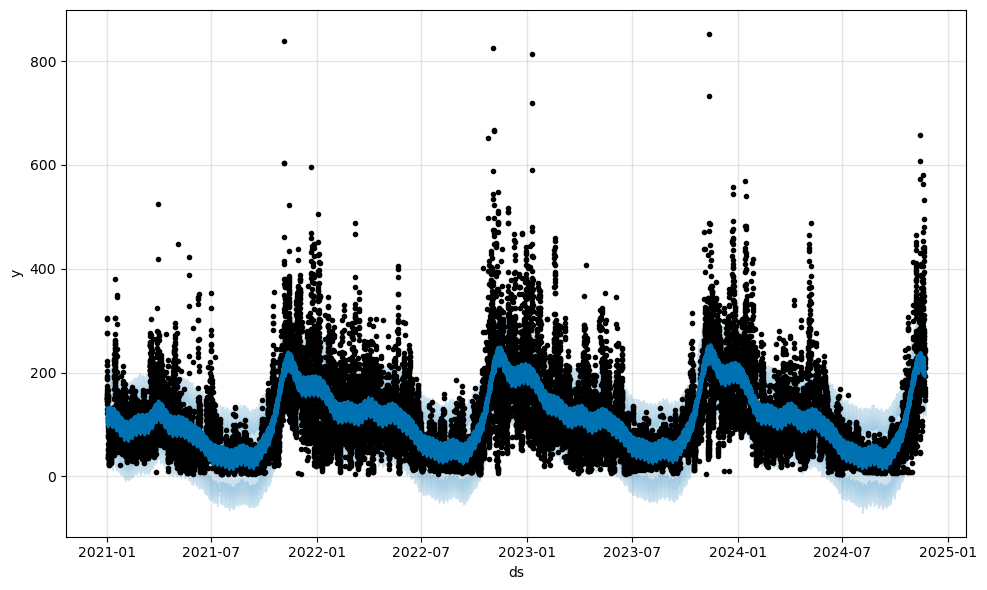

In [113]:
fig1 = model.plot(forecast1)

"plot_components_plotly" creates interactive plots using Plotly, allowing for zooming and hovering over data points for more detailed exploration.

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Li

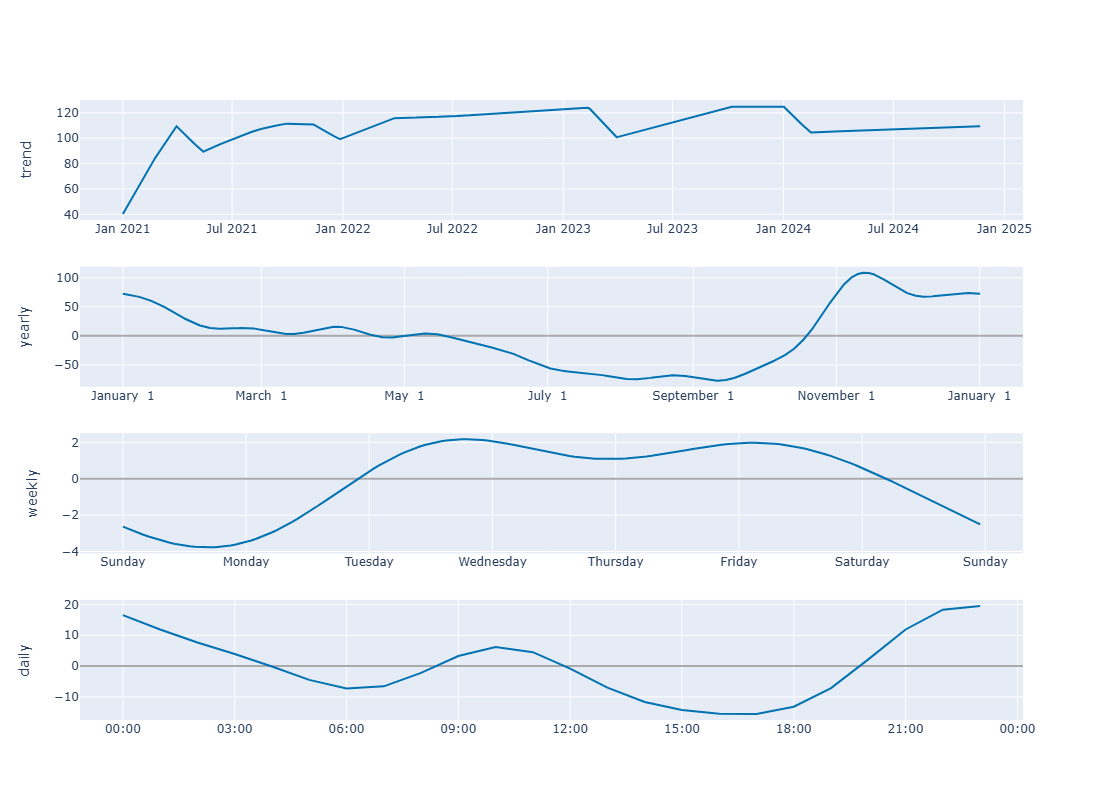

In [114]:
plot_components_plotly(model, forecast1)

In [115]:
# training the prophet model for PM10
model = Prophet()
model.fit(model2)

12:27:02 - cmdstanpy - INFO - Chain [1] start processing
12:27:37 - cmdstanpy - INFO - Chain [1] done processing


In [116]:
future2 = model.make_future_dataframe(periods=20, freq='H')
future2.tail()

ds
32073 2024-11-21 15:00:00
32074 2024-11-21 16:00:00
32075 2024-11-21 17:00:00
32076 2024-11-21 18:00:00
32077 2024-11-21 19:00:00

In [117]:
forecast2 = model.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

ds        yhat  yhat_lower  yhat_upper
32058 2024-11-21 00:00:00  447.677710  317.690887  571.993903
32059 2024-11-21 01:00:00  434.565645  304.486233  568.219220
32060 2024-11-21 02:00:00  422.773275  289.305025  564.212947
32061 2024-11-21 03:00:00  411.311134  276.442869  542.193104
32062 2024-11-21 04:00:00  398.841650  261.447729  536.407743
32063 2024-11-21 05:00:00  387.422786  245.208109  513.342189
32064 2024-11-21 06:00:00  382.114629  245.791853  511.391313
32065 2024-11-21 07:00:00  386.556198  243.546580  517.617336
32066 2024-11-21 08:00:00  398.840859  258.654421  534.638609
32067 2024-11-21 09:00:00  411.929227  268.684836  552.700806
32068 2024-11-21 10:00:00  418.526605  287.265501  550.111732
32069 2024-11-21 11:00:00  416.093753  275.724751  545.006972
32070 2024-11-21 12:00:00  407.638148  288.922543  545.008004
32071 2024-11-21 13:00:00  398.087056  261.627424  540.996904
32072 2024-11-21 14:00:00  390.183219  259.772069  523.407254
32073 2024-11-21 15:00:00  383.880733  251.976108  510.527654
32074 2024-11-21 16:00:00  379.255924  246.595517  514.869922
32075 2024-11-21 17:00:00  379.126941  250.097965  507.724227
32076 2024-11-21 18:00:00  387.855731  257.207006  520.977390
32077 2024-11-21 19:00:00  406.935423  271.621678  545.909095

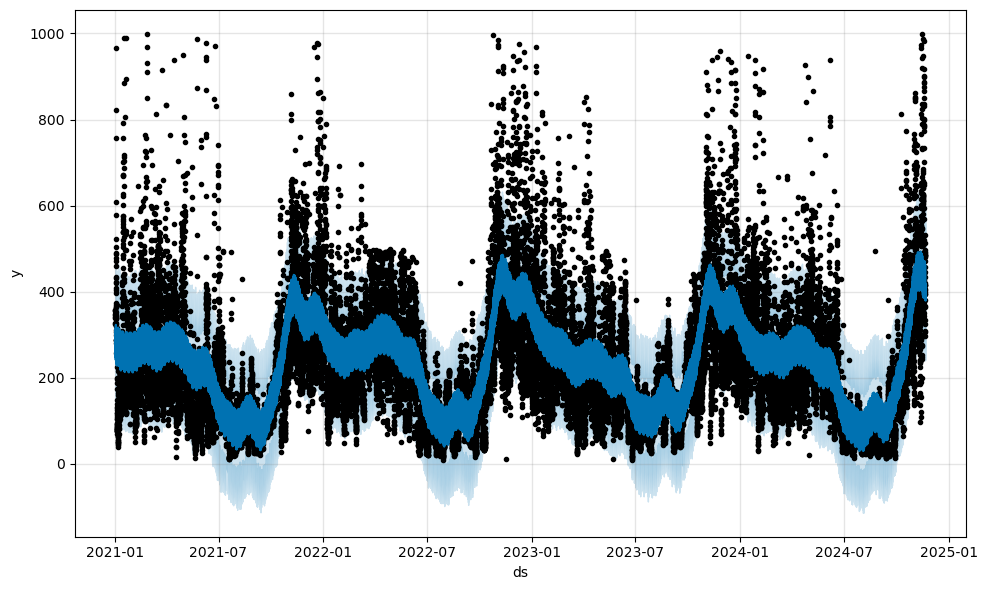

In [118]:
fig2 = model.plot(forecast2)

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\VISHAL\anaconda3\Li

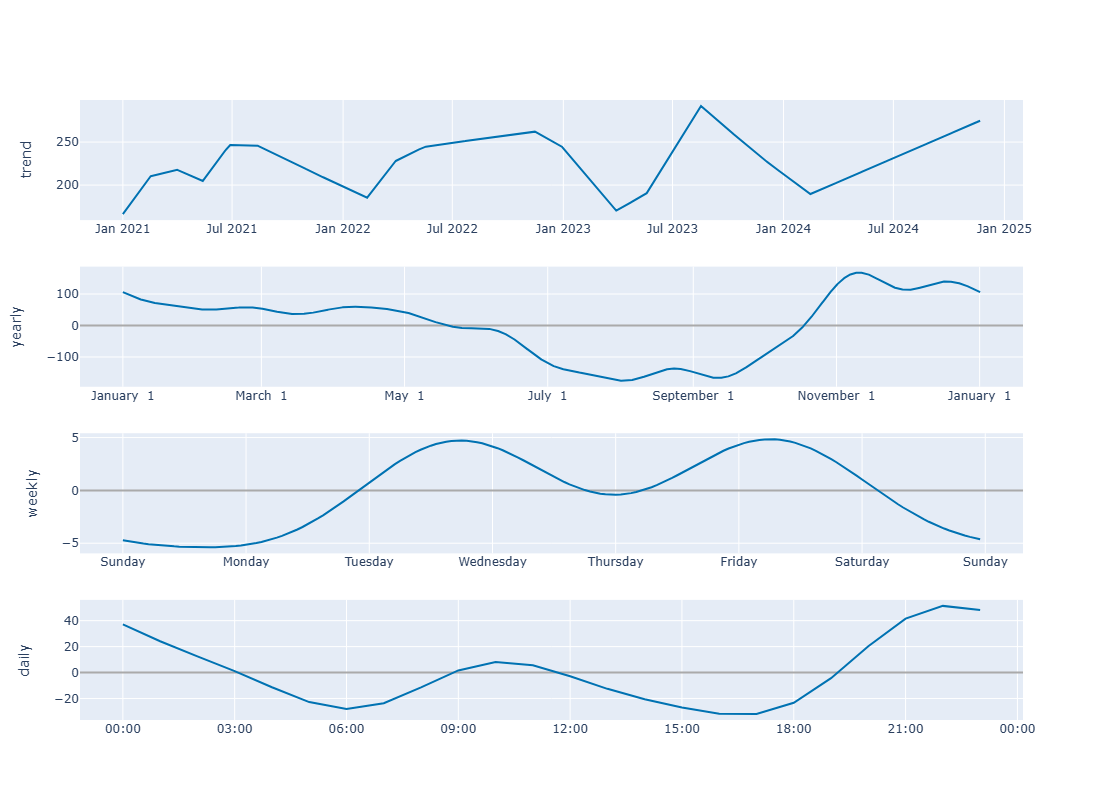

In [119]:
plot_components_plotly(model, forecast2)

Thank You!